# Wrangle and Analyze Data

wrangle WeRateDogs Twitter data to analyze and visualize it.

    WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings 
    almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 

By Maram Mahmoud

### Gathering Data

I will gather data from three sources.
 - The WeRateDogs Twitter archive. This file is locally available.
 - The tweet image predictions, what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is hosted on Udacity's servers.
 - Each tweet's retweet count and favorite count. Using the tweet IDs in the WeRateDogs Twitter archive query the Twitter API for each tweet's JSON data using Python's Tweepy library.
I will import each source's data in separate pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json

import matplotlib.pyplot as plt
%matplotlib inline

#### Getting WeRateDogs Twitter archive

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

#### Getting tweet image predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_df = pd.read_csv('image-predictions.tsv', sep='\t' )

#### Getting more tweet information

setting my Twitter API 

In [4]:
'''
consumer_key = '00'
consumer_secret = '00'
access_token = '0-00'
access_secret = '00'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
''';

downloading Tweepy status object based on Tweet ID from archive and store in list 'tweets_status'

In [5]:
'''
tweets =[]
for tweet_id in archive_df['tweet_id']:
    try:
        tweet = api.get_status(id = tweet_id)
        tweets.append(tweet)
    except:
        pass
''';

Isolating the json part of each tweepy status and storing it in txt file

In [6]:
'''
tweets_json = []
for tweet_json in tweets_status:
    tweets_json.append(tweet_json._json)
    
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweets_json, outfile)
outfile.close()
''';

importing data in a dataframe 

In [7]:
df_list =[]
with open('tweet_json.txt', 'r') as file: 
    for j in file:
        data = json.loads(j)
        df_list.append({'tweet_id':data['id'],
                       'retweet_count':data['retweet_count'],
                       'favorite_count':data['favorite_count']})
json_df = pd.DataFrame(df_list,columns = ['tweet_id','retweet_count','favorite_count'])

    Please note that I didn't use what I actually got from twitter API because it was way less than 
    what in the archive.

## Assessing data

**Visual assessment** by looking through the data

In [8]:
archive_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [9]:
image_df

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [10]:
json_df

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

<font color=Blue > **I noticed that each variable forms a column in dog stage.**</font>

<font color=Blue > **And each type of observational unit forms a table (archive_df, image_df, data_df).**</font>

<font color=Blue > **I should make one column for image prediction and one column for confidence to summarize the prediction result.**</font>

**Programmatic assessment** by using pandas helpful functions (e.g. info(), value_count(), duplicated(), etc)

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<font color=Blue > **The timestamp should be type date.**</font>

<font color=Blue > **There are 181 values in retweeted_status_id and retweeted_status_user_id. not original tweets**</font>

In [14]:
print('number of tweets in archive =',len(archive_df.tweet_id))
print('number of tweets from image predictions =',len(image_df.tweet_id))
print('number of tweets from twitter API =',len(json_df.tweet_id))

number of tweets in archive = 2356
number of tweets from image predictions = 2075
number of tweets from twitter API = 2354


<font color=Blue > **The images dataframe contains the smallest subset of tweets. and because I dont have the algorithm to complete images information,I will subset the other dataframes to just the tweets that are contained in images.
The tweet that is in archive but not fond in twitter database is likely a deleted tweet.**</font>

In [15]:
print('- whole set of tweets from image predictions contained in the set of archive tweets?  ' + 
      str(image_df.tweet_id.isin(archive_df.tweet_id).all()))

print('- whole set of tweets from image predictions contained in the set of tweets from twitter API?  ' +
      str(image_df.tweet_id.isin(json_df.tweet_id).all()))

- whole set of tweets from image predictions contained in the set of archive tweets?  True
- whole set of tweets from image predictions contained in the set of tweets from twitter API?  False


<font color=Blue > **I don't have data (from API) for all tweet collected from image predictions**</font>

In [16]:
sum(archive_df.tweet_id.duplicated())

0

In [17]:
sum(image_df.tweet_id.duplicated())

0

In [18]:
sum(json_df.tweet_id.duplicated())

0

<font color=Blue > **good thing there are no duplicated tweets**</font>

In [19]:
print('Number of denominators not equal to 10 is' ,len(archive_df[archive_df.rating_denominator != 10]))

Number of denominators not equal to 10 is 23


In [20]:
archive_df[archive_df.rating_denominator != 10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

<font color=Blue > **From visual assessment earlier I noticed most dogs rated out of 10 but 23 one is not.**</font>

<font color=Blue > It is either tweets that contain more than one dog or wrong identificating the percentage from the tweet text. </font>

In [21]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
#last tweet showed in denominator != 10 was indexd 2335 lets see the full text of it.
print('tweet : ',archive_df['text'][2335])
print('numerator = ',archive_df['rating_numerator'][2335])
print('denominator = ',archive_df['rating_denominator'][2335])
archive_df['text'][2335]

tweet :  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
numerator =  1
denominator =  2


'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

<font color=Blue > **A lot of ratings goes above 10/10 and there are unvalid rating numerators**</font>

In [23]:
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Buddy         7
Bailey        7
Daisy         7
Toby          7
Stanley       6
Leo           6
Koda          6
Jack          6
Oscar         6
Rusty         6
Milo          6
Dave          6
Jax           6
Bella         6
Scout         6
Gus           5
           ... 
Tyrus         1
Clifford      1
Jeremy        1
Edmund        1
Ralph         1
Taco          1
DonDon        1
Ralf          1
Berkeley      1
Nugget        1
Cedrick       1
Bloo          1
Godi          1
Tedders       1
Gilbert       1
Todo          1
Eleanor       1
Andy          1
Willie        1
Kobe          1
Brutus        1
Baron         1
Lili          1
Pippin        1
Ambrose       1
Pilot         1
Ozzie         1
Mya           1
Howie         1
Major         1
Name: name, Length: 957,

In [24]:
archive_df.loc[ archive_df.name.str.islower() ].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
actually         2
getting          2
not              2
mad              2
infuriating      1
my               1
incredibly       1
by               1
unacceptable     1
his              1
light            1
this             1
officially       1
life             1
old              1
such             1
all              1
space            1
Name: name, dtype: int64

<font color=Blue > **Data contains unvalid names like a, the and an**</font>

In [25]:
sum(image_df['jpg_url'].duplicated())

66

<font color=Blue > **There are 66 duplicat images**</font>

In [26]:
image_df.loc[(image_df.p1_dog==False) & (image_df.p2_dog==False) & (image_df.p3_dog==False) ,'jpg_url']

6         https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
17        https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
18        https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
21        https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg
25        https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg
29        https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg
45        https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg
50        https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg
51        https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg
53        https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg
56        https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg
69        https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg
73        https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg
77        https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
78        https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
93        https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg
94        https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg
96        http

<font color=Blue >**Not all the image are for doges as the algorithm predicted.** </font>

### Issues
  
<font color=red> **Quality issues** </font>
  - Completeness:
      - *Missing data in images file*
      - *Missing data in JSON file*
  - Validity:
      - *Invalid  timestamp type*
      - *Invalid dog names*
      - *Invalid rating denomnator*
      - *Invalid rating numerator*
  - Accuracy:
      - *Duplicated dog images*
      - *The data contain retweets that aren't from original user*
      - *Inaccurate images that are not for dogs*

  - Consistency:
      - *Inconsistent dog rating*
      
<font color=red> **Tidiness issues** </font>
- Each variable forms a column in dog stages. 
- Delete columns that won't be used for analysis.
- Each type of observational unit forms a table (archive_df, image_df, data_df).


## Cleaning Data

In [27]:
archive_clean = archive_df.copy()
images_clean = image_df.copy()
json_clean = json_df.copy()

**Define**

<font color=Blue > Missing data in **images_df** and **json_df** files. Keep the intersect (greatest common subset) of all files. </font>

**Code**

In [28]:
#assign the ids to keep to be as the smallest set (images)
tweets_to_keep = set(images_clean.tweet_id)

#assign json file to have the intersect tweet of images set and json set
json_clean = json_clean[json_clean['tweet_id'].isin(tweets_to_keep)]

#assign that ids to be the ids to keep
tweets_to_keep = set(json_clean.tweet_id)

#assign archive file to have the intersect tweet of tweet to keep
archive_clean = archive_clean[archive_clean['tweet_id'].isin(tweets_to_keep)]

#assign images file to have the intersect tweet of tweet to keep
images_clean = images_clean[images_clean['tweet_id'].isin(tweets_to_keep)]

**Test**

In [29]:
print('archive_clean tweet count = ' + str(len(archive_clean)))
print('images_clean tweet count  = ' + str(len(images_clean)))
print('json_clean tweet count    = ' + str(len(json_clean)),'\n')

print('- All image set is in the archive set?  ' + 
      str(images_clean.tweet_id.isin(archive_clean.tweet_id).all()))

print('- All image set is in the json set? ' +
      str(images_clean.tweet_id.isin(json_clean.tweet_id).all()))

archive_clean tweet count = 2073
images_clean tweet count  = 2073
json_clean tweet count    = 2073 

- All image set is in the archive set?  True
- All image set is in the json set? True


**Define**

<font color=Blue > Invalid  timestamp type. change it to date. </font>

**Code**

In [30]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

**Test**

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: datetime64[ns](1), 

**Define**

<font color=Blue > Invalid dog names. change the wrong names to None. </font>

**Code**

In [32]:
archive_clean.set_value(archive_clean.name.str.islower() ,'name','None');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


**Test**

In [33]:
archive_clean.loc[ archive_clean.name.str.islower() ].name.value_counts()

Series([], Name: name, dtype: int64)

**Define**

 - <font color=Blue > Invalid rating denomnator. </font>
 - <font color=Blue > Invalid  rating numerator.  </font>
 - <font color=Blue > Inconsistent dog rating.   </font>

<font color=Blue > remove tweets that do not contain the string '/10' in the tweet text. then manually correct the tweets which were wrongly identified.</font>

**Code**

In [34]:
# Inconsistent tweets
tweets_to_remove = set(archive_clean[~archive_clean.text.str.contains('/10')].tweet_id)

json_clean = json_clean[~json_clean['tweet_id'].isin(tweets_to_remove)]
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(tweets_to_remove)]
images_clean = images_clean[~images_clean['tweet_id'].isin(tweets_to_remove)]

# the wrong tweets 
tweets_to_correct = set(archive_clean[archive_clean.rating_denominator!=10].tweet_id)

In [35]:
archive_clean.set_value(archive_clean.rating_denominator!=10 ,'rating_denominator',10);
for ID in tweets_to_correct :
    tweet = archive_clean[archive_clean.tweet_id==ID].text
    numerator = tweet.str.extract(pat = '(..)/10')[0]
    archive_clean.set_value(archive_clean.tweet_id==ID,'rating_numerator', numerator);
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


**Test**

In [36]:
print('number of rating_denominator not equal 10 is ', len(archive_clean[archive_clean.rating_denominator!=10]))
set = archive_clean[archive_clean['tweet_id'].isin(tweets_to_correct)]
print(list(set.text) ,'\n', set.rating_numerator )

number of rating_denominator not equal 10 is  0
['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5', 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'] 
 1068    14
1165    13
1202    11
1662    10
2335     9
Name: rating_numerator, dtype: int64


**Define**

<font color=Blue > Duplicated dog images. delete these tweets and keep the first one.</font>

**Code**

In [37]:
images_clean = images_clean.drop_duplicates(subset='jpg_url', keep='first')

**Test**

In [38]:
sum(images_clean['jpg_url'].duplicated())

0

**Define**

<font color=Blue > The data contain retweets that aren't from original user. delete them.</font>

**Code**

In [39]:
# Retweets
tweets_to_remove =archive_clean[~archive_clean['retweeted_status_id'].isnull()].tweet_id

json_clean = json_clean[~json_clean['tweet_id'].isin(tweets_to_remove)]
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(tweets_to_remove)]
images_clean = images_clean[~images_clean['tweet_id'].isin(tweets_to_remove)]

**Test**

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1981 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     1981 non-null datetime64[ns]
source                        1981 non-null object
text                          1981 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1981 non-null object
rating_numerator              1981 non-null int64
rating_denominator            1981 non-null int64
name                          1981 non-null object
doggo                         1981 non-null object
floofer                       1981 non-null object
pupper                        1981 non-null object
puppo                         1981 non-null object
dtypes: datetime64[ns](1), flo

**Define**

<font color=Blue > Inaccurate images that are not for dogs. delete it.</font>

**Code**

In [41]:
dog_type = []
confidence_list = []

def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_type.append(images_clean['p1'])
        confidence_list.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        dog_type.append(images_clean['p2'])
        confidence_list.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        dog_type.append(images_clean['p3'])
        confidence_list.append(images_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
      
images_clean.apply(image, axis=1)

#create new columns
images_clean['dog_type'] = dog_type
images_clean['confidence_list'] = confidence_list

tweets_to_remove = images_clean[images_clean['dog_type'] == 'Error'].tweet_id

json_clean = json_clean[~json_clean['tweet_id'].isin(tweets_to_remove)]
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(tweets_to_remove)]
images_clean = images_clean[~images_clean['tweet_id'].isin(tweets_to_remove)]



**Test**

In [42]:
images_clean.loc[(images_clean.p1_dog==False) & (images_clean.p2_dog==False) & (images_clean.p3_dog==False) ,'jpg_url']

Series([], Name: jpg_url, dtype: object)

**Define**

<font color=Blue > Each variable forms a column in dog stages. Convert doggo, floofer, pupper, puppo, and none to categories in a single column. drop the tweets that have more than one stage. </font>

**Code**

In [43]:
archive_clean.doggo = archive_clean.doggo.replace('None', 0)
archive_clean.doggo = archive_clean.doggo.replace('doggo', 1)
archive_clean.floofer = archive_clean.floofer.replace('None', 0)
archive_clean.floofer = archive_clean.floofer.replace('floofer', 1)
archive_clean.pupper = archive_clean.pupper.replace('None', 0)
archive_clean.pupper = archive_clean.pupper.replace('pupper', 1)
archive_clean.puppo = archive_clean.puppo.replace('None', 0)
archive_clean.puppo = archive_clean.puppo.replace('puppo', 1)

archive_clean['none'] = 1 - (archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo)
print('Duplicate stage categories = ' + str(archive_clean[archive_clean.none == -1].tweet_id.count()))

Duplicate stage categories = 10


In [44]:
tweets_to_remove = archive_clean[archive_clean.none == -1].tweet_id

json_clean = json_clean[~json_clean['tweet_id'].isin(tweets_to_remove)]
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(tweets_to_remove)]
images_clean = images_clean[~images_clean['tweet_id'].isin(tweets_to_remove)]

In [45]:
values = ['doggo', 'floofer', 'pupper', 'puppo', 'none']
ids = [x for x in list(archive_clean.columns) if x not in values]
archive_clean = pd.melt(archive_clean, id_vars = ids, value_vars = values, var_name='stage')

In [46]:
archive_clean = archive_clean[archive_clean.value == 1]
archive_clean.drop('value', axis=1, inplace=True)
archive_clean.reset_index(drop=True, inplace=True);
archive_clean.stage = archive_clean.stage.astype('category')

**Test**

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 14 columns):
tweet_id                      1664 non-null int64
in_reply_to_status_id         18 non-null float64
in_reply_to_user_id           18 non-null float64
timestamp                     1664 non-null datetime64[ns]
source                        1664 non-null object
text                          1664 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1664 non-null object
rating_numerator              1664 non-null int64
rating_denominator            1664 non-null int64
name                          1664 non-null object
stage                         1664 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 170.9+ KB


In [48]:
archive_clean.stage.value_counts()

none       1414
pupper      168
doggo        54
puppo        21
floofer       7
Name: stage, dtype: int64

**Define**

<font color=Blue > Delete columns that won't be used for analysis. </font>

**Code**

In [49]:
archive_clean.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

In [50]:
#Delete columns
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'source',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp',
                                    'expanded_urls',
                                    'rating_denominator' ], 1)

In [51]:
json_clean.columns.tolist()

['tweet_id', 'retweet_count', 'favorite_count']

In [52]:
images_clean.columns.tolist()

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_type',
 'confidence_list']

In [53]:
images_clean = images_clean.drop(['img_num',
                                  'p1',
                                  'p1_conf',
                                  'p1_dog',
                                  'p2',
                                  'p2_conf',
                                  'p2_dog',
                                  'p3',
                                  'p3_conf',
                                  'p3_dog'],1)

**Test**

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 6 columns):
tweet_id            1664 non-null int64
timestamp           1664 non-null datetime64[ns]
text                1664 non-null object
rating_numerator    1664 non-null int64
name                1664 non-null object
stage               1664 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 66.9+ KB


In [55]:
archive_clean.rating_numerator

0       14
1       12
2       12
3       12
4       12
5       13
6       13
7       13
8       12
9       13
10      13
11      14
12      12
13      12
14      12
15      11
16      13
17      14
18      12
19      13
20      12
21      13
22      13
23      14
24      11
25      14
26      11
27      11
28      11
29      11
        ..
1634     7
1635    10
1636     6
1637     7
1638    12
1639    10
1640     7
1641     9
1642    11
1643     8
1644    10
1645     9
1646     9
1647    11
1648    11
1649     8
1650     9
1651     6
1652    10
1653     9
1654    10
1655     8
1656     9
1657    10
1658    10
1659     5
1660     6
1661     9
1662     7
1663     8
Name: rating_numerator, Length: 1664, dtype: int64

In [56]:
archive_clean.columns.tolist()

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'stage']

In [57]:
json_clean.columns.tolist()

['tweet_id', 'retweet_count', 'favorite_count']

In [58]:
images_clean.columns.tolist()

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

**Define**

<font color=Blue > Each type of observational unit forms a table (archive_df, image_df, data_df). Consolidate archive and json and images into a single table.</font>

**Code**

In [59]:
print(archive_clean.shape)
print(json_clean.shape)
print(images_clean.shape)
df_twitter = pd.merge(archive_clean, 
                      images_clean, 
                      how = 'left', on = ['tweet_id'])
df_twitter = pd.merge(df_twitter, json_clean, 
                      how = 'left', on = ['tweet_id'])

(1664, 6)
(1664, 3)
(1664, 4)


**Test**

All tables should be part of one dataset

In [60]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 11 columns):
tweet_id            1664 non-null int64
timestamp           1664 non-null datetime64[ns]
text                1664 non-null object
rating_numerator    1664 non-null int64
name                1664 non-null object
stage               1664 non-null category
jpg_url             1664 non-null object
dog_type            1664 non-null object
confidence_list     1664 non-null object
retweet_count       1664 non-null int64
favorite_count      1664 non-null int64
dtypes: category(1), datetime64[ns](1), int64(4), object(5)
memory usage: 144.8+ KB


### Store

In [61]:
df_twitter.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing

### <font color=Green >What is the most common dog type?</font>

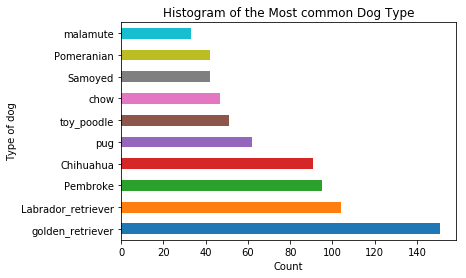

In [62]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 33)
df_dog_type['dog_type'].value_counts().plot(kind = 'barh')

plt.title('Histogram of the Most common Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

plt.show()

<font color=Green > **Golden retriever is the most common dog in this dataset then Labrador retriever then Pembroke.** </font >
<img src=https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg alt="Alt text that describes the graphic" title="Title text" />

### <font color=Green >What is the lowest rated dog type?</font>

In [63]:
df_twitter.groupby('dog_type').mean().rating_numerator.sort_values()

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.538462
Scotch_terrier                  9.000000
curly-coated_retriever          9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
Boston_bull                     9.416667
dalmatian                       9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Airedale                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
Saint_Bernard                   9.857143
English_setter                  9.875000
miniature_poodle                9.875000
Brabancon_griffon              10.000000
Italian

<font color=Green > **Japanese spaniel is the lowest rated dog in this dataset.** </font >
<img src=https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg  alt="Alt text that describes the graphic" title="Title text" />

### <font color=Green >Which stage gets a higher rating?</font>

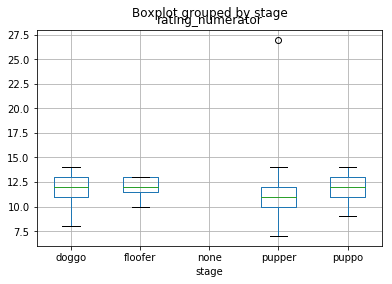

In [64]:
subset = df_twitter
subset = subset.drop(subset[subset['stage'] == 'none'].index)
subset.boxplot(column='rating_numerator', by='stage');

<font color=Green >**Floofer consistently gets high rating.**</font>

### <font color=Green >Is retweets on the @dog_rates tweets has increased over the time? </font>

Text(0,0.5,'Retweets per Tweet')

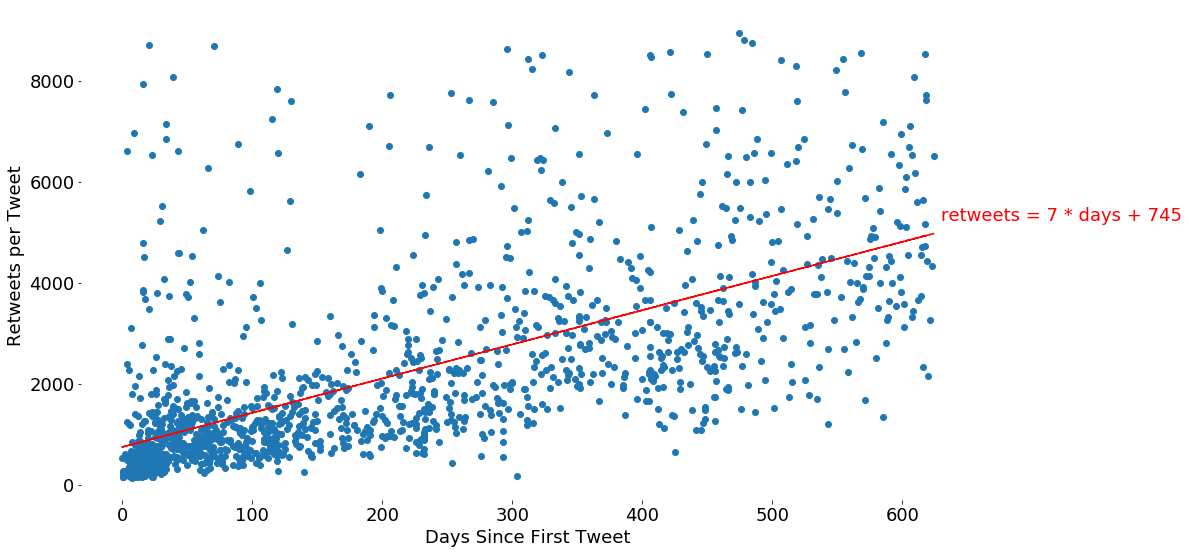

In [65]:
q = df_twitter.retweet_count.quantile([0.05, 0.95])

subset = df_twitter
subset = subset.drop(df_twitter[df_twitter['retweet_count'] < q[0.05]].index)
subset = subset.drop(df_twitter[df_twitter['retweet_count'] > q[0.95]].index)

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

x = subset['timestamp'].dt.dayofyear + \
        (subset['timestamp'].dt.year-2015)*365-319
y = subset['retweet_count']

plt.scatter(x, y);

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

label = "retweets = %.0f * days + %.0f"%(z[0],z[1])

plt.text(630, 5220, label, fontsize=18, color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Days Since First Tweet', fontsize=18)
plt.ylabel('Retweets per Tweet', fontsize=18)

<font color=Green > **The retweets count doubled to sevenfold per day** </font >